# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
df.head(5)
#выведем 5 первых строк на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.sample(5)
#выведем еще 5 случайных строк на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15691,4,1800000.0,53.5,2017-11-24T00:00:00,2,2.5,5.0,29.7,1,NaN,...,8.1,NaN,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
10744,11,5700000.0,63.2,2019-01-23T00:00:00,3,2.7,9.0,39.8,2,NaN,...,10.4,1.0,Санкт-Петербург,29681.0,12542.0,0.0,NaN,0.0,NaN,72.0
15532,15,3500000.0,35.0,2017-12-25T00:00:00,1,NaN,9.0,15.0,8,NaN,...,11.0,NaN,Пушкин,18271.0,32842.0,1.0,63.0,0.0,NaN,231.0
15386,14,6900000.0,77.0,2016-06-23T00:00:00,3,2.8,4.0,45.6,4,NaN,...,11.0,NaN,Санкт-Петербург,21681.0,6073.0,1.0,731.0,1.0,266.0,579.0
21617,8,2750000.0,46.0,2017-06-03T00:00:00,2,NaN,5.0,29.0,1,NaN,...,7.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,85.0


In [5]:
df.shape
#выведем размер датасета на экран

(23699, 22)

In [6]:
df.info()
#выведем общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

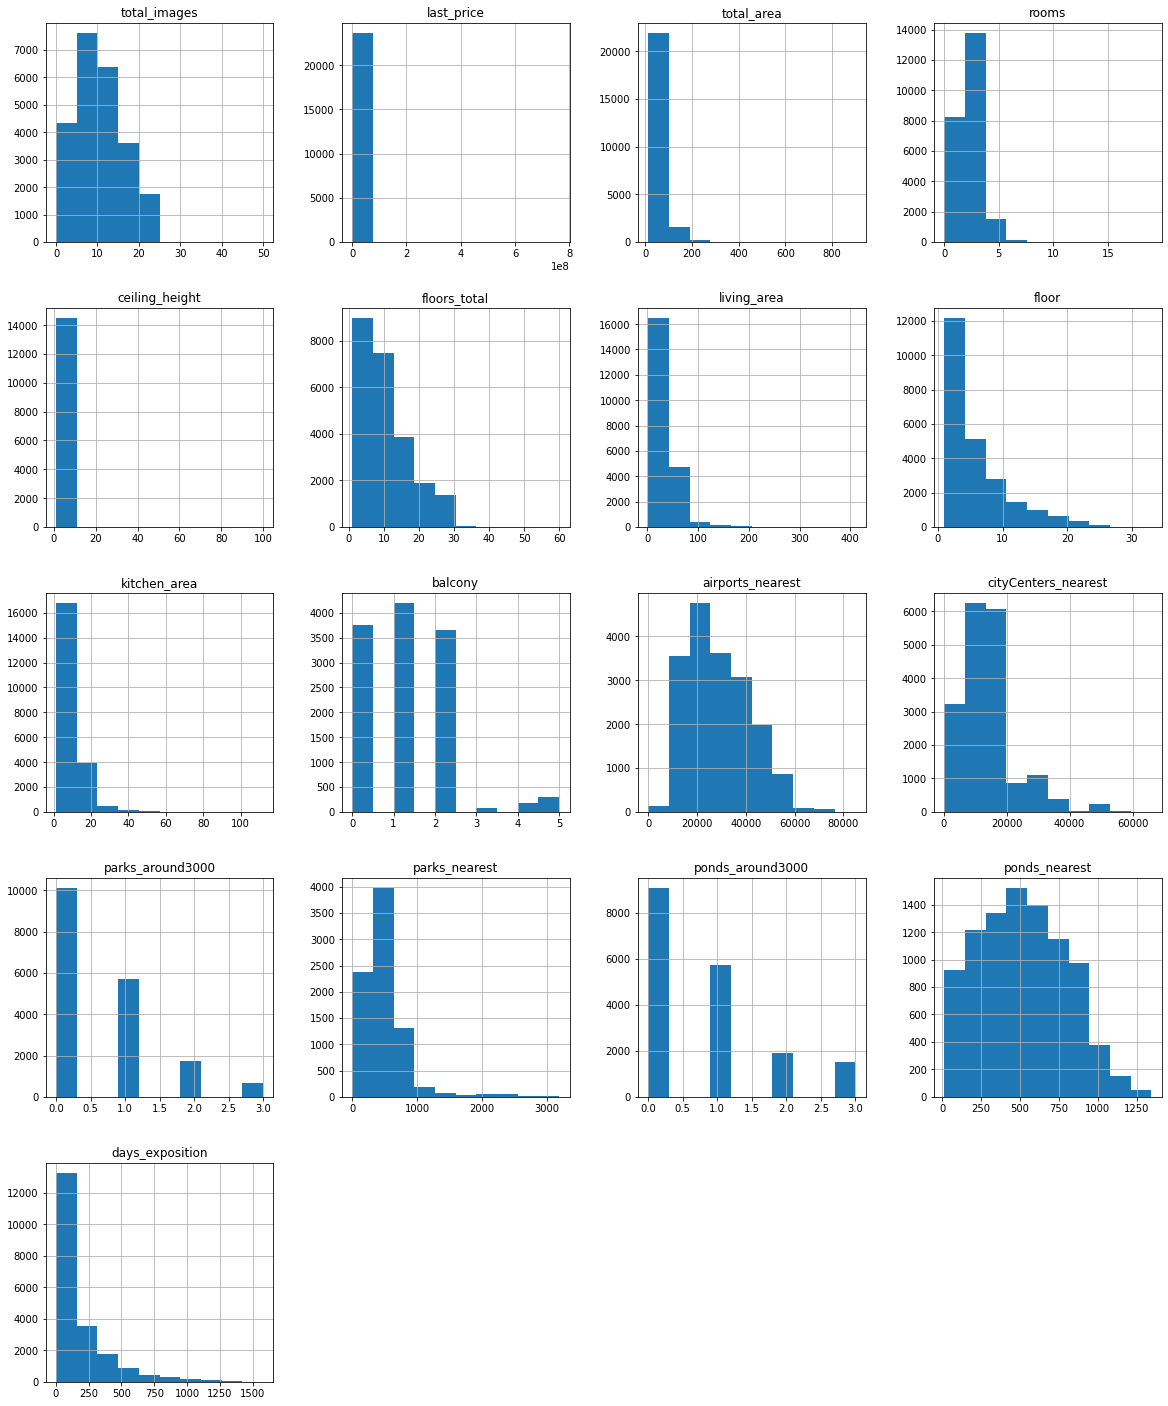

In [7]:
df.hist(figsize=(20, 25))
plt.show()
#построим общую гистограмму для всех столбцов таблицы

**Вывод:**
В датасете 23699 строк.
В данных есть пропуски, у некоторых данных необходимо изменить тип.

### Предобработка данных

**2.1 Найдем и изучим пропущенные значения в столбцах**

In [8]:
df.isna().sum()
#определим количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков в данных немало.

Логически можно заполнить столбцы с типом недвижимости (апартаменты) `is_apartment`, с количеством балконов `balcony` и количеством парков и водоемов вблизи 3 км `parks_around3000`, `ponds_around3000`. Эти стобцы содержат пропуски из-за того, что в объекте продавца нет балконов, а также поблизости парков и водоемов. 

Пропуски в столбце `ceiling_height` заполним медианными значениями, т.к. в данных есть выбросы.

Записи с пропусками `locality_name` удалим, т.к. они могут относиться не к Лен. области и Санкт-Петербургу.
Записи с отсутствующим общим количеством этажей `floors_total` также можно удалить, т.к. таких строк меньше 0.5%, а итоговые выводы опираются в том числе и на этот параметр.

Остальные столбцы оставим без изменений, т.к. пропуски в них не заполнить корректно на основании имеющихся данных.

In [9]:
df.dropna(subset=['locality_name'], inplace=True)
#удаление записей с пропусками в солбце 'locality_name'

In [10]:
df.dropna(subset=['floors_total'], inplace=True)
#удаление записей с пропусками в солбце 'floors_total'

In [11]:
df['is_apartment'].unique()
# посмотрим на уникальные значения в столбце

array([nan, False, True], dtype=object)

В столбце `is_apartment` пропуски, скорее всего, связаны с тем, что тип недвижимости не относится к аппартаментам.
Заполним пропуски значениями "False" 

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)
# заполним пропуски значением 'False'

In [13]:
df['balcony'].unique()
# посмотрим на уникальные значения в столбце

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Аналогичная ситуация и в столбце `balcony`: если значения нет - нет и балконов в квартире.
Установим количество балконов вместо пропусков равное нулю.

In [14]:
df['balcony'] = df['balcony'].fillna(0)
# заполним пропуски нулями

In [15]:
df['parks_around3000'].unique()
# посмотрим на уникальные значения в столбце

array([ 1.,  0.,  2., nan,  3.])

In [16]:
df['ponds_around3000'].unique()
# посмотрим на уникальные значения в столбце

array([ 2.,  0.,  3.,  1., nan])

В столбцах `parks_around3000` и `ponds_around3000`, вероятно, пропуски связаны с тем, что вблизи 3 км парков и водоемов нет. Заменим пропуски нулями.

In [17]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
# заполним пропуски нулями

In [18]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
# заполним пропуски нулями

In [19]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
# пропуски в столбце с высотой потолка заполним медианными значениями

Проверим, что пропуски в обработанных столбцах исчезли.

In [20]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски обработаны.
Наиболее вероятные причины появления пропусков:
* Некоторые картографические данные могут отсутствовать по данным объектам недвижимости
* Пользователи сознательно не указали данные, такие как количество балконов, тип недвижимости вместо нулей

**2.2 Рассмотрим типы данных в каждом столбце**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Тип данных в столбце `first_day_exposition` следует изменить на дату-время.
А тип данных в столбцах `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` - на целочисленный.

Это важно сделать для того, чтобы в дальнейшем производить корректные расчеты, а также убедиться, что в ячейках находится требуемый тип данных.

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#изменение типа данных на дата-время

Заменим тип данных в столбцах `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` на целочисленный.

In [23]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**2.3 Найдем дубликаты и удалим их**

In [25]:
df.duplicated().sum()
# поиск явных дубликатов

0

In [26]:
df['locality_name'].sort_values().unique()
#выведем на экран уникальные значения локаций

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Есть неявные дубликаты: "поселок" и "посёлок", "поселок городского типа" и "поселок". Их необходимо обработать.

In [27]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа', 'посёлок')
#обработаем дубликаты в столбце с локациями

In [28]:
df['locality_name'].unique()
#проверим, что изменения внесены

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское

**2.4 Найдем и устраним редкие и выбивающиеся значения.**

In [29]:
df.describe()
# посмотрим на основные показатели описательной статистики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим, что выбросы есть в столбцах `last_price`, `ceiling_height`, `living_area`, `parks_nearest`, `floors_total`, `airports_nearest`

In [30]:
df['last_price'].sort_values(ascending=False)
#отсортируем значения в столбце с ценой по убыванию, чтобы понять, есть ли выбросы

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
            ...     
16219       450000.0
16274       440000.0
17456       430000.0
14911       430000.0
8793         12190.0
Name: last_price, Length: 23565, dtype: float64

Более 300 млн. руб. стоят самые дорогие квартиры. Цифры большие, нужно посмотреть на строку целиком, чтобы оценить правдоподобность данных.
Самые дешевые - 430 и 12 тыс. руб. Похоже, что это аномалия. Посмотрим детальнее.

In [31]:
df[df['last_price'] > 330000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Судя по данным, это жилье в элитном квартале, поэтому аномалиями назвать их нельзя.

In [32]:
df[df['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31,2,2.65,1,23.0,1,False,...,5.8,0,городской посёлок Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
6859,6,490000.0,40.0,2017-12-11,1,2.65,5,NaN,3,False,...,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,43.0
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31,2,2.65,5,30.3,3,False,...,5.5,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0
10782,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,False,...,5.5,0,Сланцы,NaN,NaN,0,NaN,0,NaN,719.0
14911,5,430000.0,54.0,2018-06-26,2,2.65,3,NaN,3,False,...,NaN,0,посёлок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0
16032,8,480000.0,32.0,2019-01-06,1,2.65,2,16.0,1,False,...,NaN,0,Сланцы,NaN,NaN,0,NaN,0,NaN,83.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,NaN,1,False,...,NaN,0,деревня Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.0
16274,18,440000.0,40.0,2018-07-10,1,2.65,5,NaN,1,False,...,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN


Большая часть дешевых квартир расположена в Лен. области, поэтому цена вполне обоснована. Однако, двухкомнатная квартира в Санкт-Петербурге площадью 100 м2 за 12190 рублей - это явная аномалия! Удалим эту строку из датасета.

In [33]:
df = df.loc[df['last_price'] > 12190]
#удалим строку с аномальной ценой

In [34]:
df['ceiling_height'].sort_values(ascending=False)
#отсортируем значения в столбце с высотой потолка по убыванию, чтобы понять, есть ли выбросы

22869    100.00
3148      32.00
22336     32.00
21377     27.50
4876      27.00
          ...  
4212       2.00
2572       2.00
16934      1.75
5712       1.20
22590      1.00
Name: ceiling_height, Length: 23564, dtype: float64

В данных явно что-то не так:
- выбросы в минимальных значения: 1, 1.2, 1.75м
- максимальные значения в выборке указаны в см

In [35]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] < 20, df['ceiling_height']/10)
#Обработаем значения, большие или равные 20 см

In [36]:
df = df.loc[(df['ceiling_height'] >=2)&(df['ceiling_height'] <= 5)]
#удалим значения высоты потолков меньшие, чем 2 метра и меньшие 5м (сталинки)

In [37]:
df[df['living_area'] < 18.6]['living_area'].sort_values(ascending=False)
#т.к. в данных есть пропуски, отсортируем значения в столбце с жилой площадью меньшие 1-го квартиля по убыванию, чтобы понять, есть ли выбросы

17846    18.57
7766     18.55
6511     18.50
8281     18.50
22476    18.50
         ...  
17582     5.00
23574     3.00
3242      3.00
13915     2.00
21758     2.00
Name: living_area, Length: 5362, dtype: float64

Учитывая, что минимальное значение общей площади 12 м2, удалим строки, в которых значение жилой площади составляет менее 6 м2 - половины от общей площади.

In [38]:
df = df.loc[df['living_area'] >= 6]
#удалим строки, в которых значение жилой площади составляет менее 6 м2.

In [39]:
df = df.loc[df['floors_total'] <= 37]
#удалим строки, в которых количество этажей больше 37 (максимальное количество этажей в жилом здании в СПб - 37)

В столбце `airports_nearest` указано минимальное расстояние до аэропорта 0 м. Такого быть не может, это точно аномалия в данных. Удалим такие значения.

In [40]:
df = df.loc[df['airports_nearest'] != 0]

**Вывод**

Пропуски обработаны.
Наиболее вероятные причины появления пропусков:
* Некоторые картографические данные могут отсутствовать по данным объектам недвижимости
* Пользователи сознательно не указали данные, такие как количество балконов, тип недвижимости вместо нулей

Также удалены аномалии в данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
df['cost_m2'] = (df['last_price']/df['total_area']).round()
#Добавим столбец с ценой 1 м2 и округлим его до целого числа

In [42]:
df['weekday_exposition'] = df['first_day_exposition'].dt.dayofweek
# добавим столбец с номером дня недели публикации объявления

In [43]:
df['month_exposition'] = df['first_day_exposition'].dt.month
# добавим столбец с месяцем публикации объявления

In [44]:
df['year_exposition'] = df['first_day_exposition'].dt.year
# добавим столбец с годом публикации объявления

In [45]:
df['floors_total'].value_counts()
# посмотрим на распределение объявлений по общему количеству этажей в доме 

5     5300
9     3539
12    1267
16    1265
10    1080
4     1072
25     966
6      858
17     776
3      609
7      544
14     516
18     461
24     420
2      356
8      349
15     326
23     316
19     298
22     257
20     242
13     206
11     176
27     154
21     139
26     114
35      23
1       20
28      20
36       3
34       1
29       1
33       1
Name: floors_total, dtype: int64

Записей с одноэтажными домами всего 20, поэтому нет разницы, к какому типу этажа относить квартиры в одноэтажном доме

In [46]:
def floor_type_group(row):
    fl = row['floor']
    fl_total = row['floors_total'] 
    if fl == 1:
        return 'первый'
    elif fl == fl_total and fl != 1:
        return 'последний'
    else:
        return 'другой'
# создадим функцию, которая будет на вход принимать строку, и возвращать тип этажа квартиры.
# введем ограничение, что если квартира находится на 1 этаже в одноэтажном доме,

In [47]:
df['floor_type'] = df.apply(floor_type_group, axis=1)
# добавим столбец с типом этажа квартиры

In [48]:
df['city_center'] = (df['cityCenters_nearest']/1000).round()
# добавим столбец с расстоянием до центра города в километрах

**Вывод**

Добавлены столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### Проведите исследовательский анализ данных

**4.1 Изучим следующие параметры объектов:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

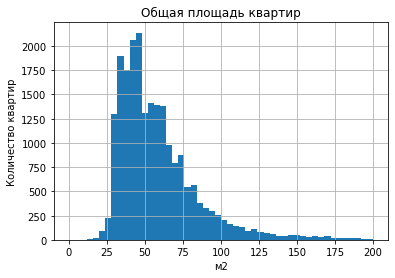

Три варианта c наибольшей общей площадью:
15651    618.0
12859    631.2
19540    900.0
Name: total_area, dtype: float64


In [49]:
df['total_area'].hist(bins=50, range=(0,200))
plt.title('Общая площадь квартир')
plt.xlabel('м2')
plt.ylabel('Количество квартир')
plt.show()
print('Три варианта c наибольшей общей площадью:')
print(df[~df['total_area'].isna()]['total_area'].sort_values().tail(3))

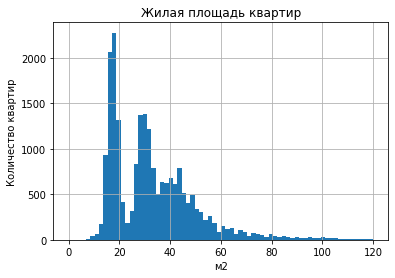

Три варианта c наибольшей жилой площадью:
12401    347.5
5358     409.0
19540    409.7
Name: living_area, dtype: float64


In [50]:
df['living_area'].hist(bins=70, range=(0,120))
plt.title('Жилая площадь квартир')
plt.xlabel('м2')
plt.ylabel('Количество квартир')
plt.show()
print('Три варианта c наибольшей жилой площадью:')
print(df[~df['living_area'].isna()]['living_area'].sort_values().tail(3))

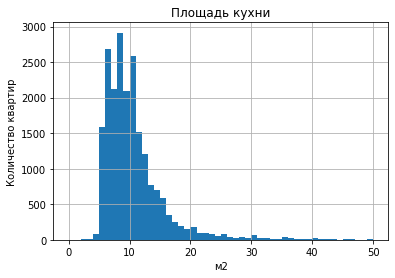

Три варианта c наибольшей площадью кухни:
2489     100.7
20215    107.0
19540    112.0
Name: kitchen_area, dtype: float64


In [51]:
df['kitchen_area'].hist(bins=50, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('м2')
plt.ylabel('Количество квартир')
plt.show()
print('Три варианта c наибольшей площадью кухни:')
print(df[~df['kitchen_area'].isna()]['kitchen_area'].sort_values().tail(3))

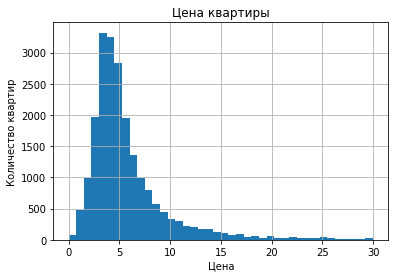

Три варианта с наименьшей ценой:
17456    0.43
5698     0.45
9581     0.45
Name: last_price_mln, dtype: float64

Три варианта c наибольшей ценой:
14706    401.3
19540    420.0
12971    763.0
Name: last_price_mln, dtype: float64


In [52]:
df['last_price_mln'] = (df['last_price']/1000000).round(3)
# для удолства визуализации данных, отобразим цену в млн руб.

df['last_price_mln'].hist(bins=40, range=(0, 30))
plt.title('Цена квартиры')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print('Три варианта с наименьшей ценой:')
print(df[~df['last_price_mln'].isna()]['last_price_mln'].sort_values().head(3))
print()
print('Три варианта c наибольшей ценой:')
print(df[~df['last_price_mln'].isna()]['last_price_mln'].sort_values().tail(3))

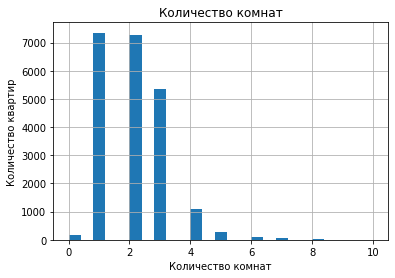

Три варианта c наибольшим количеством комнат:
5358     15
18848    16
14498    19
Name: rooms, dtype: int64


In [53]:
df['rooms'].hist(bins=25, range=(0, 10))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Три варианта c наибольшим количеством комнат:')
print(df[~df['rooms'].isna()]['rooms'].sort_values().tail(3))

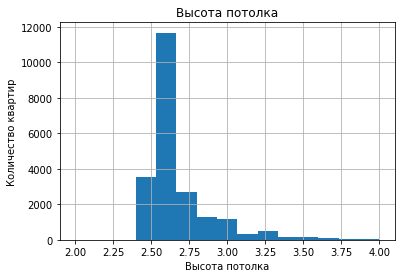

In [54]:
df['ceiling_height'].hist(bins=15, range=(2, 4))
plt.title('Высота потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

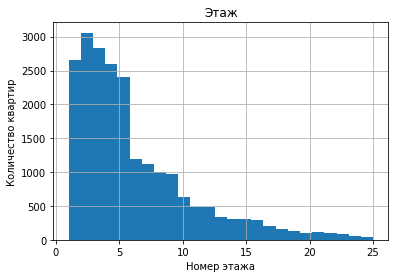

Три самые высокорасположенные квартиры:
18629    31
11575    32
18218    33
Name: floor, dtype: int64


In [55]:
df['floor'].hist(bins=25, range=(1, 25))
plt.title('Этаж')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.show()

print('Три самые высокорасположенные квартиры:')
print(df[~df['floor'].isna()]['floor'].sort_values().tail(3))

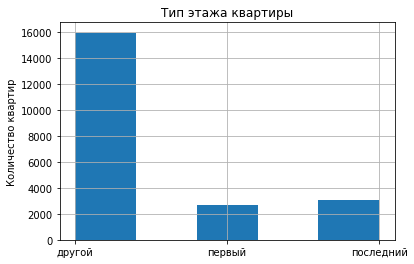

In [56]:
df['floor_type'].hist(bins=5)
plt.title('Тип этажа квартиры')
plt.ylabel('Количество квартир')
plt.show()

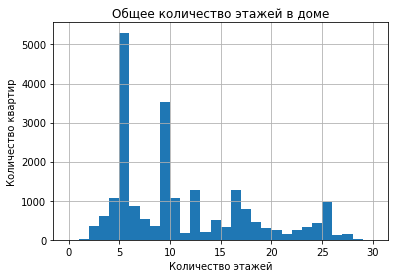

Три варианта c максимальным количеством этажей в доме:
397      36
11079    36
5807     36
Name: floors_total, dtype: int64


In [57]:
df['floors_total'].hist(bins=30, range=(0, 30))
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

print('Три варианта c максимальным количеством этажей в доме:')
print(df[~df['floors_total'].isna()]['floors_total'].sort_values().tail(3))

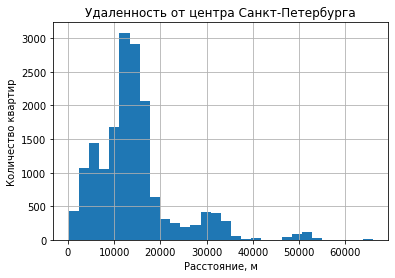

Три варианта с наименьшей удаленностью от центра города:
13694    181.0
1182     208.0
8614     215.0
Name: cityCenters_nearest, dtype: float64

Три варианта c наибольшей удаленностью от центра города:
577     65764.0
5340    65952.0
9640    65968.0
Name: cityCenters_nearest, dtype: float64


In [58]:
df['cityCenters_nearest'].hist(bins=30)
plt.title('Удаленность от центра Санкт-Петербурга')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

print('Три варианта с наименьшей удаленностью от центра города:')
print(df[~df['cityCenters_nearest'].isna()]['cityCenters_nearest'].sort_values().head(3))
print()
print('Три варианта c наибольшей удаленностью от центра города:')
print(df[~df['cityCenters_nearest'].isna()]['cityCenters_nearest'].sort_values().tail(3))

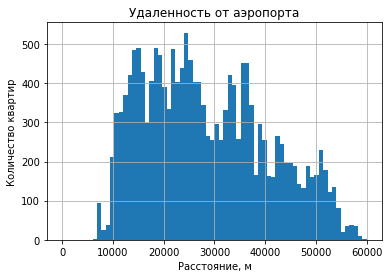

Три варианта с наименьшей удаленностью от аэропорта:
12899    6450.0
4017     6450.0
7778     6914.0
Name: airports_nearest, dtype: float64

Три варианта c наибольшей удаленностью от аэропорта:
577     84665.0
5340    84853.0
9640    84869.0
Name: airports_nearest, dtype: float64


In [59]:
df['airports_nearest'].hist(bins=70, range=(0, 60000))
plt.title('Удаленность от аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

print('Три варианта с наименьшей удаленностью от аэропорта:')
print(df[~df['airports_nearest'].isna()]['airports_nearest'].sort_values().head(3))
print()
print('Три варианта c наибольшей удаленностью от аэропорта:')
print(df[~df['airports_nearest'].isna()]['airports_nearest'].sort_values().tail(3))

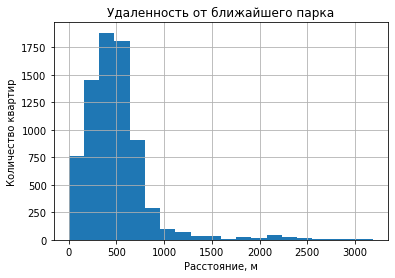

In [60]:
df['parks_nearest'].hist(bins=20)
plt.title('Удаленность от ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

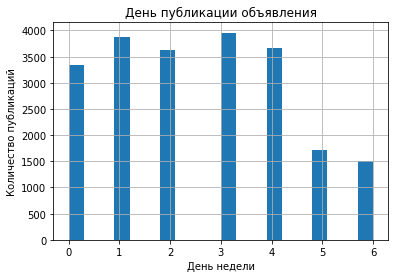

In [61]:
df['weekday_exposition'].hist(bins=20)
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество публикаций')
plt.show()

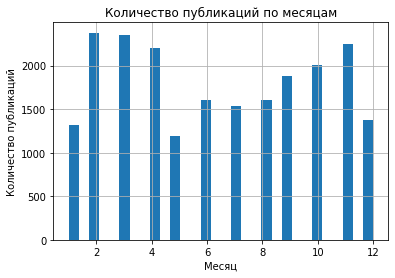

In [62]:
df['month_exposition'].hist(bins=30)
plt.title('Количество публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.show()

**Выводы:**

1. **Общая площадь.**

У большей части выборки общая площадь составляет от 30 до 125 м2.
Наибольшая общая площадь достигает 900 м2.

2. **Жилая площадь.**

Большая часть вариантов с жилой площадью от 10 до 60 м2. Максимальная жилая площадь - 409 м2.
На графике есть минимум 4 пика, скорее всего, связанные с тем, что это максимальные значения для разного количества комнат.

3. **Площадь кухни.**

Подавляющее большинство вариантов с площадью кухни от 5 до 15 м2. Тем не менее есть и те, у которых площадь кухни достигает 100 м2, судя по всему, это квартиры с общей площадью от 400 м2. 

4. **Цена объекта.**

Большая часть вариантов с ценой от 2,5 до 6 млн. руб. Три варианта с максимальной стоимостью - от 400 млн. руб. Скорее всего, это элитное жилье в Санкт-Петербурге. Минимальные - до 450 тыс. руб. - варианты в Лен. области. 

5. **Количество комнат.**

Большая часть квартир - однокомнатные и двухкомнатные. Немного реже попадаются объявления о продаже трехкомнатных квартир. Объявлений о продаже четырехкомнатных квартир мало (всего около 1000), 5-тикомнатных и более совсем мало, как и студий (0 комнат). А наибольшее количество комнат достигает таких значений, как 15, 16, 19.

6. **Высота потолков.**

Большая часть квартир с высотой потолка 2,7 м. Видимо, это стандартная высота потолка при проектировании жиой недвижимости.

7. **Этаж квартиры.**

Большая часть вариантов - квартиры на этажах с 1 по 5-ый. Чем более высокий этаж, тем меньше вариантов. Это подтверждается тем, что на 31, 32, 33 этажах всего по 1 квартире.

8. **Тип этажа квартиры («первый», «последний», «другой»).**

Количество объявлений с квартирами на первом и последнем этажах примерно одинаково. А на других этажах почти в 3 раза больше, чем на первом и последнем вместе взятых.

9. **Общее количество этажей в доме.**

Большая часть объявлений - квартиры в 5-ти этажных и 9-ти этажных домах. Дома с таким количеством этажей чаще всего строят в Лен. области, а также строили в Санкт-Петербурге до 2000-ных гг.

10. **Расстояние до центра города в метрах.**

Большая часть объявлений - квартиры с удаленностью от центра города от 9 до 15 км.
Есть квартиры в центре города, а есть и те, которые удалены на расстояние более 60 км (квартиры в населенных пунктах Лен. области).

11. **Расстояние до ближайшего аэропорта.**

Вблизи аэропорта жилья практически нет. Подавляющее большинство вариантов с удаленностью от аэропорта от 10 до 55 км. Минимальное расстояние - 6,5 км. Максимальное - 85 км.

12. **Расстояние до ближайшего парка.**

Почти все квартиры, рядом с которыми находится хотя бы 1 парк, удалены от него не более, чем на 1 км.

13. **День и месяц публикации объявления.**

Объявления чаще размещаются в будние дни. 
Активнее всего продают квартиры в весенний и осенний период. В мае и летом активность спадает.
Это связано с отпусками, праздниками.

**4.2 Изучим, как быстро продавались квартиры**

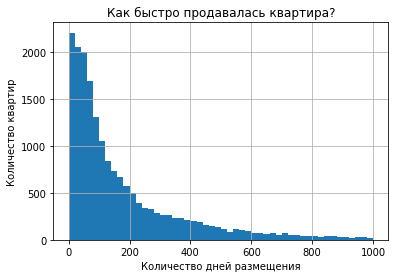

count    18701.000000
mean       184.767659
std        221.433364
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

Количество дней (среднее): 185.0
Количество дней (медианное): 101.0


In [63]:
#гистограмма времени продаж
#отбрасываем все пропуски в значениях
df[~df['days_exposition'].isna()]['days_exposition'].hist(bins=50, range=(0, 1000))
plt.title('Как быстро продавалась квартира?')
plt.xlabel('Количество дней размещения')
plt.ylabel('Количество квартир')
plt.show()

#описательная статистика столбца со временем продажи квартиры
print(df['days_exposition'].describe())

print()
#среднее количество дней, за которое продаются квартиры
print('Количество дней (среднее):', df[~df['days_exposition'].isna()]['days_exposition'].mean().round())
#медианное количество дней, за которое продаются квартиры
print('Количество дней (медианное):', df[~df['days_exposition'].isna()]['days_exposition'].median().round())


**Вывод:**

1. Большая часть квартир продается в течение 101 дня. Есть те, которые продались за 1 день, а есть и те, объявления о продаже которых были размещены 1580 дней (почти 5 лет).
2. Быстрыми продажами можно назвать квартиры, проданные в течение 44 дней. Медленными - проданные в течение 240 дней и более.

**4.3 Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта?**

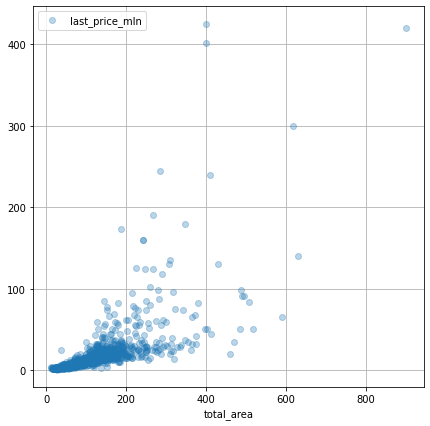

Корреляция общей площади и цены: 0.64


In [64]:
#построим диаграмму рассеяния, где для каждой общей площади будет отдельная точка с ценой
(
    df.pivot_table(index='total_area', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o', figsize=(7,7), alpha=0.3)
)
plt.show()

#рассчитаем коэффициент корреляции между общей площадью и ценой

print('Корреляция общей площади и цены:', df['total_area'].corr(df['last_price_mln']).round(2))


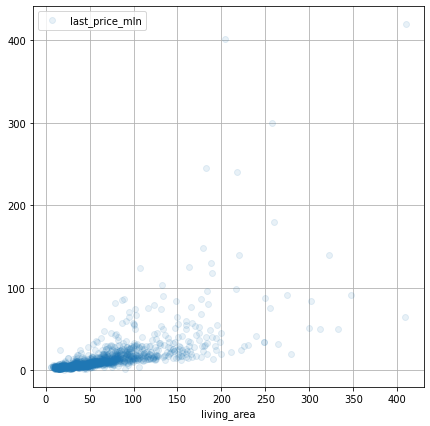

Корреляция жилой площади и цены: 0.56


In [65]:
#построим диаграмму рассеяния, где для каждой жилой площади будет отдельная точка с ценой
(
    df.pivot_table(index='living_area', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o', figsize=(7,7), alpha=0.1)
)
plt.show()

#рассчитаем коэффициент корреляции между жилой площадью и ценой

print('Корреляция жилой площади и цены:', df['living_area'].corr(df['last_price_mln']).round(2))


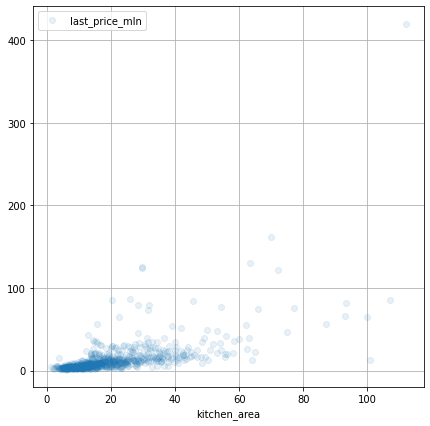

Корреляция площади кухни и цены: 0.52


In [66]:
#построим диаграмму рассеяния, где для каждой площади кухни будет отдельная точка с ценой
(
    df.pivot_table(index='kitchen_area', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o', figsize=(7,7), alpha=0.1)
)
plt.show()

#рассчитаем коэффициент корреляции между площадью кухни и ценой

print('Корреляция площади кухни и цены:', df['kitchen_area'].corr(df['last_price_mln']).round(2))


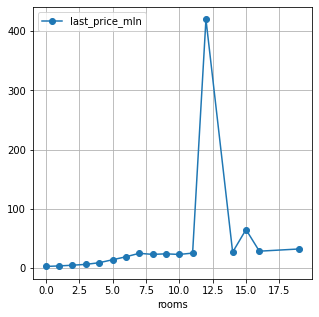

Корреляция количества комнат и цены: 0.36


In [67]:
#построим график зависимости цены квартиры от количества комнат
(
    df.pivot_table(index='rooms', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5,5), alpha=1)
)
plt.show()

#рассчитаем коэффициент корреляции между количеством комнат и ценой

print('Корреляция количества комнат и цены:', df['rooms'].corr(df['last_price_mln']).round(2))


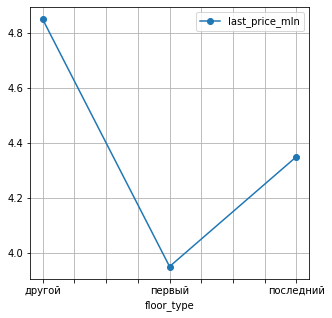

In [68]:
#построим график зависимости цены квартиры от типа этажа, на котором находится квартира
(
    df.pivot_table(index='floor_type', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5,5), alpha=1)
)
plt.show()

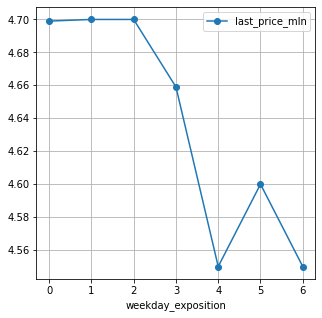

Корреляция дня недели размещения и цены: -0.0


In [69]:
#построим график зависимости цен квартиры от дня недели рамещения объявления
(
    df.pivot_table(index='weekday_exposition', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5,5), alpha=1)
)
plt.show()
print('Корреляция дня недели размещения и цены:', df['weekday_exposition'].corr(df['last_price_mln']).round(2))

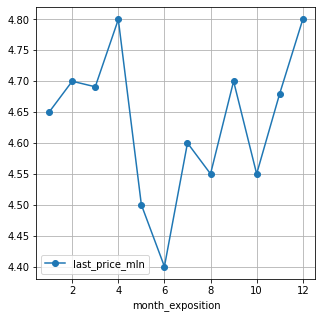

Корреляция месяца размещения и цены: 0.0


In [70]:
#построим график зависимости цены квартиры от месяца рамещения объявления
(
    df.pivot_table(index='month_exposition', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5,5), alpha=1)
)
plt.show()
print('Корреляция месяца размещения и цены:', df['month_exposition'].corr(df['last_price_mln']).round(2))

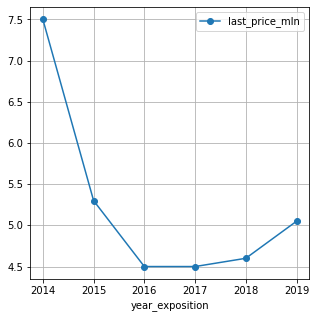

Корреляция года размещения и цены: -0.04


In [71]:
#построим график зависимости цены квартиры от года рамещения объявления
(
    df.pivot_table(index='year_exposition', values='last_price_mln', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5,5), alpha=1)
)
plt.show()
print('Корреляция года размещения и цены:', df['year_exposition'].corr(df['last_price_mln']).round(2))

**Вывод:**
1. Больше всего влияют на стоимость квартиры параметры площади. В большей степени - общая площадь, немного меньше - жилая площадь, еще меньше - площадь кухни. Чем больше площадь, тем больше цена квартиры.
Эта зависимость хорошо прослеживается для квартир с общей площадью до 125 м2.
2. Корреляция количества комнат и цены уже слабее, хотя она тоже есть. Больше комнат - выше цена квартиры.

3. Квартиры, расположенные на 1-ом этаже стоят меньше, чем на других этажах.

4. Корреляция дня недели, месяца, года размещения объявления и цены отсуствует.

**4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [72]:
# создадим список из 10 населенных пунктов с наибольшим числом объявлений
top_locality = df['locality_name'].value_counts().head(10)

# сделаем срез по значениям списка top_locality, построим сводную таблицу со средней стоимостью 1м2,
# после чего отсортируем значения по убыванию стоимости 1 м2

top_locality_cost_m2 = (
    df.query('locality_name in @top_locality.index')
    .pivot_table(index='locality_name', values='cost_m2')
    .sort_values(by='cost_m2', ascending=False)
    .round()
)
top_locality_cost_m2

,cost_m2
locality_name,
Санкт-Петербург,114101.0
Пушкин,103428.0
деревня Кудрово,92702.0
посёлок Парголово,90443.0
посёлок Мурино,86278.0
Петергоф,84481.0
посёлок Шушары,78750.0
Колпино,75344.0
Всеволожск,68880.0


In [73]:
# Населенный пункт с самой низкой средней стоимостью 1 м2
top_locality_cost_m2.tail(1)

,cost_m2
locality_name,
Гатчина,68627.0


In [74]:
# Населенный пункт с самой высокой средней стоимостью 1 м2
top_locality_cost_m2.head(1)

,cost_m2
locality_name,
Санкт-Петербург,114101.0


**Вывод:**
1. Для 10 населенных пунктов с наибольшим количеством объявлений наибольшая стоимость 1м2 наблюдается у квартир, находящихся в Санкт-Петербурге. Средняя стоимость составляет 114 тыс. руб./м2.
2. Не сильно отстает от Санкт-Петербурга г. Пушкин.
3. Самая низкая цена 1м2 - в Гатчине. Средняя стоимость составляет 68 тыс. руб./м2.

**4.5 Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.**

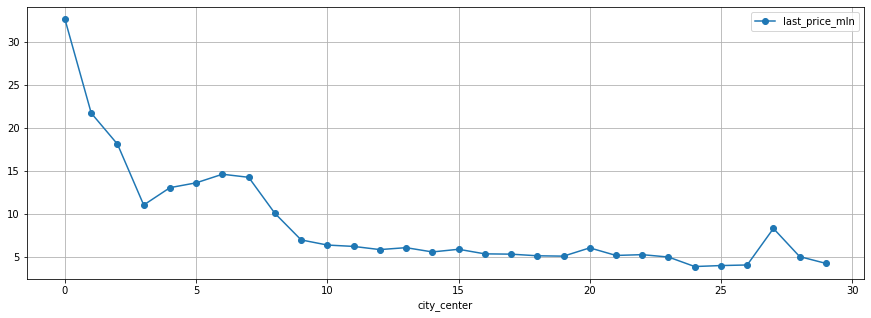

In [75]:
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center', values='last_price_mln')
    .plot(grid=True, style='o-', figsize=(15,5))
)
plt.show()

**Вывод:**
1. Стоимость квартир в центре города выше, чем у тех, которые расположены на окраинах, либо в Лен. области.
2. Судя по графику, центр города ограничивается радиусом в 8 км.

### Общий вывод

**1. Параметры для большинства квартир:**
- общая площадь **от 30 до 125 м2**;
- жилая площадь **от 10 до 60 м2**;
- площадь кухни **от 5 до 15 м2**;
- цена **от 2.5 до 6 млн руб.**;
- количество комнат **от 1 до 3**;
- высота потолков **с 1-го по 5-ый**;
- **пяти- или девятиэтажный** дом;
- удаленные от центра города на расстояние **от 9 до 15 км**;
- удаленные от аэропорта **от 10 до 55 км**;
- ближайший парк удален **не более, чем на 1 км**;

Объявления о продаже размещаются чаще в будние дни и в весенний/осенний период.

**2. Срок продажи квартир**

Большая часть квартир продается **в течение 101 дня**.

- **Быстрыми** продажами можно назвать квартиры, проданные **в течение 44 дней**. 
- **Медленными** - проданные **в течение 240 дней и более**.

**3. Факторы, влияющие на стоимость квартиры:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат.

**Больше всего влияет** на стоимость квартиры **общая площадь**. 
Особенно хорошо эта зависимость прослеживается для квартир с **общей площадью до 125 м2**.

Корреляция количества комнат и цены самая слабая, хотя она тоже есть. Больше комнат - выше цена квартиры.

Квартиры, расположенные **на 1-ом этаже стоят меньше**, чем на других этажах.

Корреляция дня недели, месяца, года размещения объявления и цены отсуствует.

**4. Стоимость 1 м2**

- **Наибольшая стоимость 1м2** наблюдается у квартир, находящихся **в Санкт-Петербурге**. **Средняя стоимость** составляет **114 тыс руб./м2**.
- **Наименьшая стоимость 1м2 - в Гатчине**. **Средняя стоимость** составляет **68 тыс. руб./м2**.

**5. Стоимость километра.**

- **Стоимость квартир в центре города выше**, чем у тех, которые расположены на окраинах, либо в Лен. области;
- Центр города ограничивается радиусом **в 8 км**.